In [2]:
# Read data from external file 
import pandas as pd 
train1 = pd.read_csv("C:/Users/User/OneDrive/Documents/Group Project/group_project_dataIT-Train_fold_1.csv")
train2 = pd.read_csv("C:/Users/User/OneDrive/Documents/Group Project/group_project_dataIT-Train_fold_2.csv")
train3 = pd.read_csv("C:/Users/User/OneDrive/Documents/Group Project/group_project_dataIT-Train_fold_3.csv")
train4 = pd.read_csv("C:/Users/User/OneDrive/Documents/Group Project/group_project_dataIT-Train_fold_4.csv")
test1 = pd.read_csv("C:/Users/User/OneDrive/Documents/Group Project/group_project_dataIT-Test_fold_1.csv")
test2 = pd.read_csv("C:/Users/User/OneDrive/Documents/Group Project/group_project_dataIT-Test_fold_2.csv")
test3 = pd.read_csv("C:/Users/User/OneDrive/Documents/Group Project/group_project_dataIT-Test_fold_3.csv")
test4 = pd.read_csv("C:/Users/User/OneDrive/Documents/Group Project/group_project_dataIT-Test_fold_4.csv")

In [3]:
# Data slicing 
xtrain1 = train1.iloc[:, 0:24] #features
ytrain1 = train1.iloc[:, 24:25] #label
xtrain2 = train2.iloc[:, 0:24] #features
ytrain2 = train2.iloc[:, 24:25] #label
xtrain3 = train3.iloc[:, 0:24] #features
ytrain3 = train3.iloc[:, 24:25] #label
xtrain4 = train4.iloc[:, 0:24] #features
ytrain4 = train4.iloc[:, 24:25] #label
xtest1 = test1.iloc[:, 0:24] #features
ytest1 = test1.iloc[:, 24:25] #label
xtest2 = test2.iloc[:, 0:24] #features
ytest2 = test2.iloc[:, 24:25] #label
xtest3 = test3.iloc[:, 0:24] #features
ytest3 = test3.iloc[:, 24:25] #label
xtest4 = test4.iloc[:, 0:24] #features
ytest4 = test4.iloc[:, 24:25] #label

Fitting 5 folds for each of 12400 candidates, totalling 62000 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
31000 fits failed out of a total of 62000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
568 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-package

Best Parameters Found:
algorithm: auto
leaf_size: 10
metric: hamming
n_neighbors: 6
weights: uniform
Best CV Training Accuracy: 0.9032258064516128
Test Accuracy: 0.7980769230769231


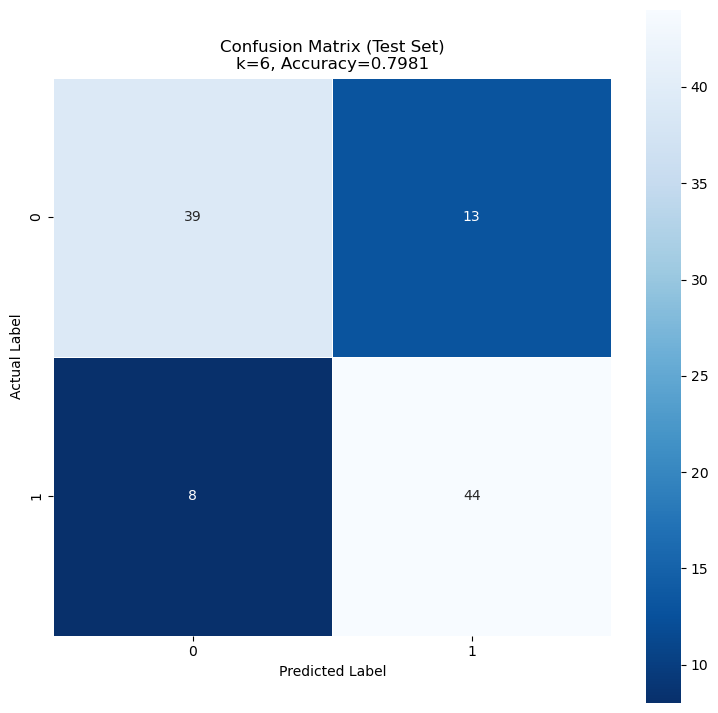

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert DataFrames to arrays (if not done yet)
xtrain1 = xtrain1.values
ytrain1 = ytrain1.values.ravel()
xtest1 = xtest1.values
ytest1 = ytest1.values.ravel()

# Define the extended parameter grid
param_grid = {
    'n_neighbors': list(range(1, 311)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute', 'balltree', 'kd_tree'],
    'leaf_size': [10, 20, 30, 40, 50],
    #'p': [1, 2],  # 1 = Manhattan, 2 = Euclidean (Minkowski)
    'metric': ['hamming'], #minkowski
}

# Create the model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(xtrain1, ytrain1)

# Display best parameters
print("Best Parameters Found:")
for key, val in grid.best_params_.items():
    print(f"{key}: {val}")

# Cross-validated training score
print("Best CV Training Accuracy:", grid.best_score_)

# Use best model to predict on test data
best_model = grid.best_estimator_
yPredtest1 = best_model.predict(xtest1)

# Test accuracy
test_acc = accuracy_score(ytest1, yPredtest1)
print("Test Accuracy:", test_acc)

# Confusion Matrix for test set
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix(ytest1, yPredtest1), annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix (Test Set)\nk={grid.best_params_['n_neighbors']}, Accuracy={test_acc:.4f}")
plt.show()

Fitting 5 folds for each of 12400 candidates, totalling 62000 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
31000 fits failed out of a total of 62000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1136 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-packag

Best Parameters Found:
algorithm: auto
leaf_size: 10
metric: hamming
n_neighbors: 74
weights: distance
Best CV Training Accuracy: 0.8741935483870968
Test Accuracy: 0.8557692307692307


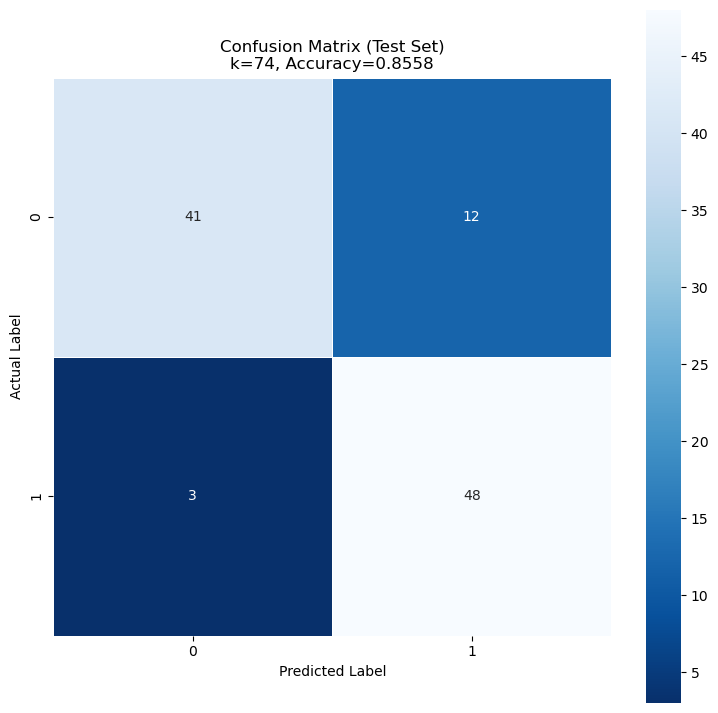

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert DataFrames to arrays (if not done yet)
xtrain2 = xtrain2.values
ytrain2 = ytrain2.values.ravel()
xtest2 = xtest2.values
ytest2 = ytest2.values.ravel()

# Define the extended parameter grid
param_grid = {
    'n_neighbors': list(range(1, 311)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute', 'balltree', 'kd_tree'],
    'leaf_size': [10, 20, 30, 40, 50],
    #'p': [1, 2],  # 1 = Manhattan, 2 = Euclidean (Minkowski)
    'metric': ['hamming'], #minkowski
}

# Create the model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(xtrain2, ytrain2)

# Display best parameters
print("Best Parameters Found:")
for key, val in grid.best_params_.items():
    print(f"{key}: {val}")

# Cross-validated training score
print("Best CV Training Accuracy:", grid.best_score_)

# Use best model to predict on test data
best_model = grid.best_estimator_
yPredtest2 = best_model.predict(xtest2)

# Test accuracy
test_acc = accuracy_score(ytest2, yPredtest2)
print("Test Accuracy:", test_acc)

# Confusion Matrix for test set
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix(ytest2, yPredtest2), annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix (Test Set)\nk={grid.best_params_['n_neighbors']}, Accuracy={test_acc:.4f}")
plt.show()

Fitting 5 folds for each of 12400 candidates, totalling 62000 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
31000 fits failed out of a total of 62000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1368 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-packag

Best Parameters Found:
algorithm: auto
leaf_size: 10
metric: hamming
n_neighbors: 8
weights: uniform
Best CV Training Accuracy: 0.8519713261648747
Test Accuracy: 0.883495145631068


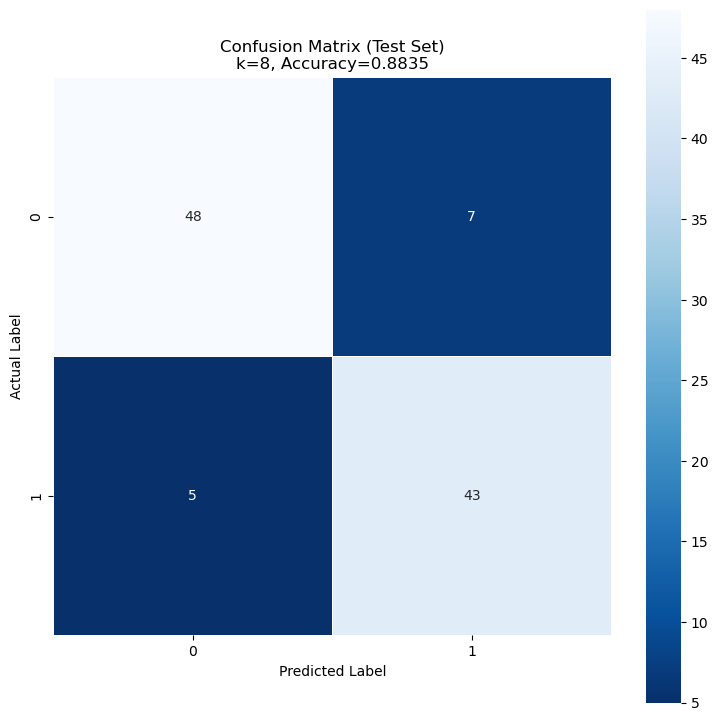

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert DataFrames to arrays (if not done yet)
xtrain3 = xtrain3.values
ytrain3 = ytrain3.values.ravel()
xtest3 = xtest3.values
ytest3 = ytest3.values.ravel()

# Define the extended parameter grid
param_grid = {
    'n_neighbors': list(range(1, 311)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute', 'balltree', 'kd_tree'],
    'leaf_size': [10, 20, 30, 40, 50],
    #'p': [1, 2],  # 1 = Manhattan, 2 = Euclidean (Minkowski)
    'metric': ['hamming'], #minkowski
}

# Create the model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(xtrain3, ytrain3)

# Display best parameters
print("Best Parameters Found:")
for key, val in grid.best_params_.items():
    print(f"{key}: {val}")

# Cross-validated training score
print("Best CV Training Accuracy:", grid.best_score_)

# Use best model to predict on test data
best_model = grid.best_estimator_
yPredtest3 = best_model.predict(xtest3)

# Test accuracy
test_acc = accuracy_score(ytest3, yPredtest3)
print("Test Accuracy:", test_acc)

# Confusion Matrix for test set
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix(ytest3, yPredtest3), annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix (Test Set)\nk={grid.best_params_['n_neighbors']}, Accuracy={test_acc:.4f}")
plt.show()

Fitting 5 folds for each of 12400 candidates, totalling 62000 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
31000 fits failed out of a total of 62000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
552 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-package

Best Parameters Found:
algorithm: auto
leaf_size: 10
metric: hamming
n_neighbors: 4
weights: uniform
Best CV Training Accuracy: 0.8714285714285713
Test Accuracy: 0.912621359223301


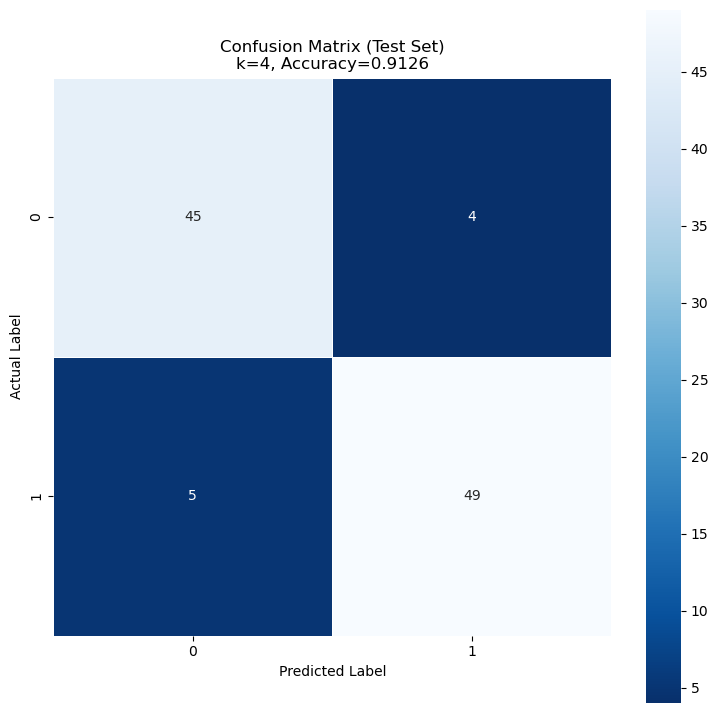

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert DataFrames to arrays (if not done yet)
xtrain4 = xtrain4.values
ytrain4 = ytrain4.values.ravel()
xtest4 = xtest4.values
ytest4 = ytest4.values.ravel()

# Define the extended parameter grid
param_grid = {
    'n_neighbors': list(range(1, 311)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute', 'balltree', 'kd_tree'],
    'leaf_size': [10, 20, 30, 40, 50],
    #'p': [1, 2],  # 1 = Manhattan, 2 = Euclidean (Minkowski)
    'metric': ['hamming'], #minkowski
}

# Create the model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(xtrain4, ytrain4)

# Display best parameters
print("Best Parameters Found:")
for key, val in grid.best_params_.items():
    print(f"{key}: {val}")

# Cross-validated training score
print("Best CV Training Accuracy:", grid.best_score_)

# Use best model to predict on test data
best_model = grid.best_estimator_
yPredtest4 = best_model.predict(xtest4)

# Test accuracy
test_acc = accuracy_score(ytest4, yPredtest4)
print("Test Accuracy:", test_acc)

# Confusion Matrix for test set
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix(ytest4, yPredtest4), annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix (Test Set)\nk={grid.best_params_['n_neighbors']}, Accuracy={test_acc:.4f}")
plt.show()